In [297]:
import numpy as np
from scipy.stats import multivariate_normal

### Question 1

In [298]:
def f(x):
  if x>0:
    return 2*np.sin(x*np.pi/1.5)
  return 0

def p(x):
  if x>0:
    return (x**0.65)*np.exp(-(x**2)/2)
  return 0

def q(x):
  return (2/np.sqrt(2*np.pi*1.5))*np.exp(-((0.8-x)**2)/(2*1.5))

### Question 2

Nous sommes dans un cas non normalisé (pour $p$ comme pour $q$), donc nous utilisons la formule d'importance sampling dans le cas auto-normalisé:

$$\frac{\sum_{i=1}^{n} \omega_{i} f(X_i) }{\sum_{i=1}^{n} \omega_{i}}$$

De plus, je me permets d'utiliser `np.random.normal` car $q$ est la densité d'une loi gaussienne à une constante multiplicative près.

In [299]:
Nlist=[10,100,1000,10000]
for N in Nlist:
  estim=np.zeros(100)  # on va faire 100 estimations Monte-Carlo par auto-normalisation
  for test in range(100):
    X=np.zeros(N)
    for k in range(N):
      r=-1
      while r<=0:
        r=np.random.normal(0.8,np.sqrt(1.5))   # attention, encore une fois : np.random.normal prend en 2e argument l'ECART TYPE et pas la variance
      X[k]=r
    omega=np.zeros(N)
    for k in range(N):
      omega[k]=p(X[k])/q(X[k])
    f_X=np.zeros(N)
    for k in range(N):
      f_X[k]=f(X[k])
    estim[test]=np.dot(omega,f_X)/omega.sum()  # formule d'importance sampling dans le cas auto-normalisé (on divise par la somme des omagas au dénominateur)
  moy=np.mean(estim)  # moyenne des estimations
  var=np.var(estim)  # variance des estimations
  print(f"Test N={N} | moyenne={moy} | variance={var}")

Test N=10 | moyenne=0.7450697698776731 | variance=0.14702489974566318
Test N=100 | moyenne=0.7615150379097995 | variance=0.015074552809316999
Test N=1000 | moyenne=0.7712371666935686 | variance=0.0014377199528050938
Test N=10000 | moyenne=0.768415071994075 | variance=0.000132398802932359


**Observation:** la variance de l'estimateur décroît en 1/N

### Question 3

In [300]:
def q(x):
  return (2/np.sqrt(2*np.pi*1.5))*np.exp(-((6-x)**2)/(2*1.5))

In [301]:
Nlist=[10,100,1000,10000]
for N in Nlist:
  estim=np.zeros(100)  # on va faire 100 estimations Monte-Carlo par auto-normalisation
  for test in range(100):
    X=np.zeros(N)
    for k in range(N):
      r=-1
      while r<=0:
        r=np.random.normal(0.8,np.sqrt(1.5))   # attention, encore une fois : np.random.normal prend en 2e argument l'ECART TYPE et pas la variance
      X[k]=r
    omega=np.zeros(N)
    for k in range(N):
      omega[k]=p(X[k])/q(X[k])
    f_X=np.zeros(N)
    for k in range(N):
      f_X[k]=f(X[k])
    estim[test]=np.dot(omega,f_X)/omega.sum()  # formule d'importance sampling dans le cas auto-normalisé (on divise par la somme des omagas au dénominateur)
  moy=np.mean(estim)  # moyenne des estimations
  var=np.var(estim)  # variance des estimations
  print(f"Test N={N} | moyenne={moy} | variance={var}")

Test N=10 | moyenne=1.2764613141790375 | variance=0.11178778754921183
Test N=100 | moyenne=1.212776974887572 | variance=0.011113128969761861
Test N=1000 | moyenne=1.1973323609458462 | variance=0.0008406180772557334
Test N=10000 | moyenne=1.2005663983867276 | variance=0.00010321854201243001


**Observation:** Déjà, il est intéressant de voir que la variance est toujours décroissante. La valeur estimée de l'espérance n'est bien sûr plus la même, puisque j'obtiens cette fois autour de $1.2$.

Comparons les poids stockés dans `omega`. Il me semble surtout intéresser de comparer `omega.sum()`.

Revenons sur le cas "$0.8$":

In [302]:
def q(x):
  return (2/np.sqrt(2*np.pi*1.5))*np.exp(-((0.8-x)**2)/(2*1.5))

somme=np.zeros(100)  # on va calculer la somme des omegas sur 100 tests différents, avec N=1000
for test in range(100):
  X=np.zeros(1000)
  for k in range(1000):
    r=-1
    while r<=0:
      r=np.random.normal(0.8,np.sqrt(1.5))
    X[k]=r
  omega=np.zeros(1000)
  for k in range(1000):
    omega[k]=p(X[k])/q(X[k])
  somme[test]=omega.sum()
moy=np.mean(somme)
var=np.var(somme)
print(f"Moyenne et variance de la somme des poids dans le cas mu=0.8 et N=1000 | moyenne={moy} | variance={var}")

Moyenne et variance de la somme des poids dans le cas mu=0.8 et N=1000 | moyenne=677.1295709063041 | variance=70.23451324624453


Revenons sur le cas "$6$":

In [303]:
def q(x):
  return (2/np.sqrt(2*np.pi*1.5))*np.exp(-((6-x)**2)/(2*1.5))

somme=np.zeros(100)  # on va calculer la somme des omegas sur 100 tests différents, avec N=1000
for test in range(100):
  X=np.zeros(1000)
  for k in range(1000):
    r=-1
    while r<=0:
      r=np.random.normal(6,np.sqrt(1.5))
    X[k]=r
  omega=np.zeros(1000)
  for k in range(1000):
    omega[k]=p(X[k])/q(X[k])
  somme[test]=omega.sum()
moy=np.mean(somme)
var=np.var(somme)
print(f"Moyenne et variance de la somme des poids dans le cas mu=6 et N=1000 | moyenne={moy} | variance={var}")

Moyenne et variance de la somme des poids dans le cas mu=6 et N=1000 | moyenne=338.39259999547374 | variance=550667.6610812804


Comparaison: (à $N$ fixé)
* La somme des poids est plus importante en moyenne dans le cas $0.8$ que dans le cas $6$. Cela témoigne que le cas $0.8$ est bien plus adapté.
* De plus, la variance de la somme des poids est très élevée dans le cas $6$, ce qui témoigne que les rares poids élevés ont été atteints pour des valeurs extrêmes (en queue de la distribution $q$), ce qui montre encore une fois que le cas $mu=6$ est un très mauvais sampling.

### Question 4

L'expression que l'on cherche à maximiser à l'étape (iii) ressemble à la log-vraisemblance complète dans l'algorithme EM pour les GMM. La seule différence, ce sont les $w_i^{(0)}$.

En introduisant les vecteurs aléatoires latents $Z_i$ comme dans le cours, on obtient la log-vraisemblance complète suivante:

$$\sum_{i=1}^{n} \sum_{j=1}^{M} w_i^{(0)} Z_{ij} \log(\alpha_j \phi(X_i^{(0)};\theta_j)) $$

Par conséquent, la mise à jour des paramètres est très similaire à l'algorithme classique, mais en prenant en compte $w_i^{(0)}$.

Etape E:
* $\gamma_{ij}^{(t)}$ sans différence avec GMM-EM \\
* $\alpha_j^{(t+1)}=\frac{\sum_{i=1}^{n} w_i^{(0)}\gamma_{ij}^{(t)} }{\sum_{i=1}^{n} w_i^{(0)}}$ au lieu de $\alpha_j^{(t+1)}=\frac{1}{n} \sum_{i=1}^{n} \gamma_{ij}^{(t)}$

Etape M:
* $\mu_j^{(t+1)}=\frac{\sum_{i=1}^{n} w_i^{(0)}\gamma_{ij}^{(t)} X_i^{(0)} }{\sum_{i=1}^{n} w_i^{(0)}\gamma_{ij}^{(t)} }$ au lieu de $\mu_j^{(t+1)}=\frac{\sum_{i=1}^{n} \gamma_{ij}^{(t)} x_i }{\sum_{i=1}^{n} \gamma_{ij}^{(t)} }$
* $\Sigma_j^{(t+1)}=\frac{\sum_{i=1}^{n} w_i^{(0)}\gamma_{ij}^{(t)} (X_i^{(0)}-\mu_j^{(t+1)})(X_i^{(0)}-\mu_j^{(t+1)})^{T} }{\sum_{i=1}^{n} w_i^{(0)}\gamma_{ij}^{(t)} }$ au lieu de $\Sigma_j^{(t+1)}=\frac{\sum_{i=1}^{n} \gamma_{ij}^{(t)} (x_i-\mu_j^{(t+1)})(x_i-\mu_j^{(t+1)})^{T} }{\sum_{i=1}^{n} \gamma_{ij}^{(t)} }$

### Question 5

Clairement, on a $\omega_{i}^{(k)}=\frac{\nu(X_i)}{q^{(k)}(X_i) }$ pour tous $i,k$.  

In [304]:
def nu(x):
  return (1/((2*np.pi)**(2.5)))*np.exp(-(x[0]**2+(x[1]+0.4*(x[0]**2-1))**2+x[2]**2+x[3]**2+x[4]**2)/2)

def minimum(p,u):
  if u<=p[0]:
    return 1
  return 2

Initialisons tout:

In [305]:
N=30   # on suppose qu'il y a 30 échantillons
omega=np.zeros(N)
alphas=np.array([0.3,0.4,0.3])   # on imagine qu'il y a 3 classes : M=3
mus=np.array([np.random.randn(5),np.random.randn(5),np.random.randn(5)])  # mu[0] donne accès au vecteur-moyenne de la 1ère gaussienne
sigmas=np.array([np.eye(5),np.eye(5),np.eye(5)])  # sigmas[0] donne accès à la matrice de covariance de la 1ère gaussienne
#sigmas[0]=sigmas[0].T@sigmas[0]
#sigmas[1]=sigmas[1].T@sigmas[1]
#sigmas[2]=sigmas[2].T@sigmas[2]    # au cas où j'initialise aléatoirement sigmas, permet de rendre les matrices de covariance symétriques déf positives, ce qui est indispensable
U=np.random.uniform(0,1,N)
X=np.zeros((N,5))
for i in range(N):
  j=minimum(alphas,U[i])
  X[i]=multivariate_normal(mus[j-1],sigmas[j-1]).rvs()   #  multivariate_normal prend en 2e argument la VARIANCE (et pas l'écart type, contrairement à np.random.normal)
  omega[i]=nu(X[i])/multivariate_normal(mus[j-1],sigmas[j-1]).pdf(X[i])
omega=omega/(omega.sum()/N) # normalisation de omega (attention, j'ai compris "normaliser" au sens de l'énoncé, càd en divisant la somme par N, de sorte que omega.sum()=N)

Ensuite, on utilise l'algorithme EM adapté:

In [306]:
def e_step(data, omega_t, mu_t, Sigma_t, a_t):
    gamma_t = np.zeros((N,3))  # gamma_ij(t)
    for i in range(N):
      for j in range(3):   # M=3 classes
          gamma_t[i, j] = a_t[j] * multivariate_normal(mean=mu_t[j], cov=Sigma_t[j]).pdf(data[i])

    for i in range(N):
      s=gamma_t[i].sum()
      for j in range(3):
        if s>0:   # j'explique à la toute fin de ce notebook pourquoi je rajoute cette condition
          gamma_t[i,j]=gamma_t[i,j]/s

    a_tp1 = np.zeros(3)
    for j in range(3):
      for i in range(N):
        a_tp1[j]+=omega_t[i]*gamma_t[i,j]
      a_tp1[j]=a_tp1[j]/omega_t.sum()

    return gamma_t, a_tp1   # gamma_ij(t)  and a_j(t+1)

def m_step(data, omega_t, gamma_t, a_tp1):
    mu_tp1 = np.zeros((3,5))
    for j in range(3):
      s=0
      for i in range(N):
        mu_tp1[j] += omega_t[i]*gamma_t[i,j] * data[i]
        s+= omega_t[i]*gamma_t[i,j]
      if s>0:
        mu_tp1[j]=mu_tp1[j]/s

    Sigma_tp1 = np.zeros((3,5,5))
    for j in range(3):
      s=0
      for i in range(N):
        Sigma_tp1[j] += omega_t[i] * gamma_t[i,j] * np.outer(data[i]-mu_tp1[j],data[i]-mu_tp1[j])   # np.outer part de 2 arrays 1D et en fait une matrice carrée par multi terme à terme
        s+= omega_t[i] * gamma_t[i,j]
      if s>0:
        Sigma_tp1[j]=Sigma_tp1[j]/s
      Sigma_tp1[j] += np.eye(5)* 1e-5   # on rajoute ceci pour éviter que Sigma ne soit plus définie positive. De même que le "s>0", c'est un artifice

    return mu_tp1, Sigma_tp1

def run_em(data, omega_t, mu_t, Sigma_t, a_t, nb_iter=100,tol=1e-4):
    log_likelihoods = []

    for i in range(nb_iter):
        print(i, end=" ")
        # E-step
        gamma_t, a_tp1 = e_step(data, omega_t, mu_t, Sigma_t, a_t)

        # M-step
        mu_tp1, Sigma_tp1 = m_step(data, omega_t, gamma_t, a_tp1)

        Q=0
        for i in range(N):
            for j in range(2):
                Q += gamma_t[i, j] * np.log(a_t[j] * max(multivariate_normal.pdf(data[i], mean=mu_t[j], cov=Sigma_t[j]), 1e-200))
        log_likelihoods.append(Q)

        mu_t = mu_tp1
        Sigma_t = Sigma_tp1
        a_t = a_tp1

        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return mu_tp1, Sigma_tp1, a_tp1, log_likelihoods

mus, sigmas, alphas, log_likelihoods = run_em(X, omega, mus, sigmas, alphas)

0 1 2 3 4 5 6 

Maintenant, on applique itérativement tout ceci.

In [307]:
for Iteration in range(10):
  print(f"===== Itération {Iteration} =====")
  U=np.random.uniform(0,1,N)
  X=np.zeros((N,5))
  for i in range(N):
    j=minimum(alphas,U[i])
    X[i]=multivariate_normal(mus[j-1],sigmas[j-1]).rvs()
    omega[i]=nu(X[i])/multivariate_normal(mus[j-1],sigmas[j-1]).pdf(X[i])
  omega=omega/(omega.sum()/N)
  mus, sigmas, alphas, log_likelihoods = run_em(X, omega, mus, sigmas, alphas)

===== Itération 0 =====
0 1 2 ===== Itération 1 =====
0 1 2 3 4 

<ipython-input-306-9975e4e22ae7>:57: RuntimeWarning: divide by zero encountered in log
  Q += gamma_t[i, j] * np.log(a_t[j] * max(multivariate_normal.pdf(data[i], mean=mu_t[j], cov=Sigma_t[j]), 1e-200))
<ipython-input-306-9975e4e22ae7>:57: RuntimeWarning: invalid value encountered in scalar multiply
  Q += gamma_t[i, j] * np.log(a_t[j] * max(multivariate_normal.pdf(data[i], mean=mu_t[j], cov=Sigma_t[j]), 1e-200))


5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 ===== Itération 2 =====
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 ===== Itération 3 =====
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 ===== Itération 4 =====
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

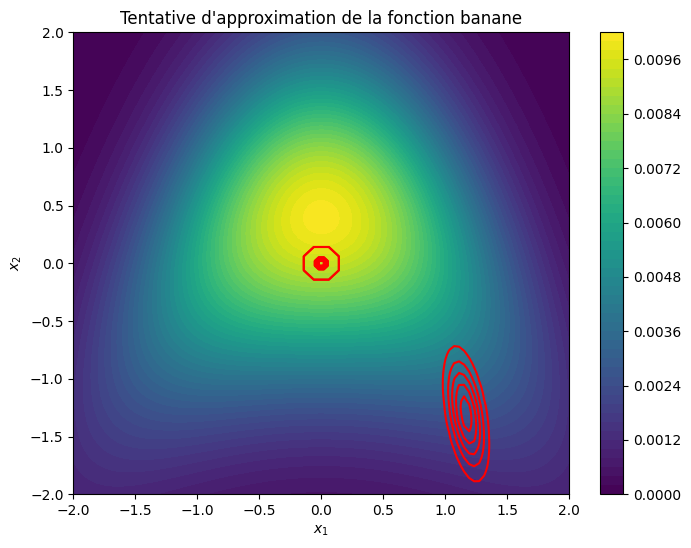

In [308]:
import matplotlib.pyplot as plt

x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)

X1, X2 = np.meshgrid(x1_range, x2_range)
val = nu([X1, X2, 0, 0, 0])

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, val, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Tentative d\'approximation de la fonction banane')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

for alpha, mu, sigma in zip(alphas, mus, sigmas):
    rv = multivariate_normal(mean=mu[0:2], cov=sigma[0:2,0:2])
    Z = rv.pdf(np.dstack((X1, X2)))
    plt.contour(X1, X2, Z, levels=5, colors='r')

plt.show()


Pour une raison que je ne comprends pas, il arrive parfois qu'à l'étape E de l'algorithme, on trouve un $i$ tel que pour tout $j$, $\gamma_{ij}=0$ ce qui génère évidemment un problème (une forme indéterminée). Dans le code, je l'ai "résolu" en mettant une disjonction de cas "$s>0$". Si vous savez comment résoudre ce problème de manière plus subtile, je suis très intéressé, car c'est un vrai frein au fonctionnement de cet algo.

De même, il arrive que la matrice de covariance ne soit plus symétrique définie positive. Pareil: j'ai décidé de régler le problème de manière artificielle en ajoutant ` np.eye(5) * 1e-5`. Si vous avez une solution plus élégante (ou une explication d'un dysfonctionnement dans mon implémentation), je suis intéressé.